In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Load Required Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [4]:
input_data = pd.read_csv('C:\\Users\\LENOVO LEGION\\Desktop\\Machine Learning\\Untitled Folder\\train.csv')       #Read csv Training file.

In [5]:
input_data.head()

,Unnamed: 0,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [6]:
print(input_data.shape)

(3500000, 20)


        lepton_1_pT  lepton_1_eta  lepton_1_phi   lepton_2_pT  lepton_2_eta  \
count  3.500000e+06  3.500000e+06  3.500000e+06  3.500000e+06  3.500000e+06   
mean   1.000232e+00  3.599349e-04  3.409634e-04  9.992382e-01  3.546249e-04   
std    6.873955e-01  1.003109e+00  1.001971e+00  6.537354e-01  1.002817e+00   
min    2.548815e-01 -2.102919e+00 -1.734789e+00  4.285860e-01 -2.059306e+00   
25%    5.625003e-01 -7.569637e-01 -8.673235e-01  5.969753e-01 -7.693463e-01   
50%    7.913588e-01  6.139759e-04 -3.000550e-04  7.997329e-01  1.132228e-04   
75%    1.204264e+00  7.581109e-01  8.681473e-01  1.161961e+00  7.698279e-01   
max    2.055345e+01  2.101605e+00  1.734839e+00  3.303562e+01  2.059721e+00   

       lepton_2_phi  missing_energy_magnitude  missing_energy_phi  \
count  3.500000e+06              3.500000e+06        3.500000e+06   
mean  -2.609503e-04              9.994536e-01       -4.940216e-04   
std    1.001447e+00              8.724024e-01        1.001655e+00   
min   -1.734

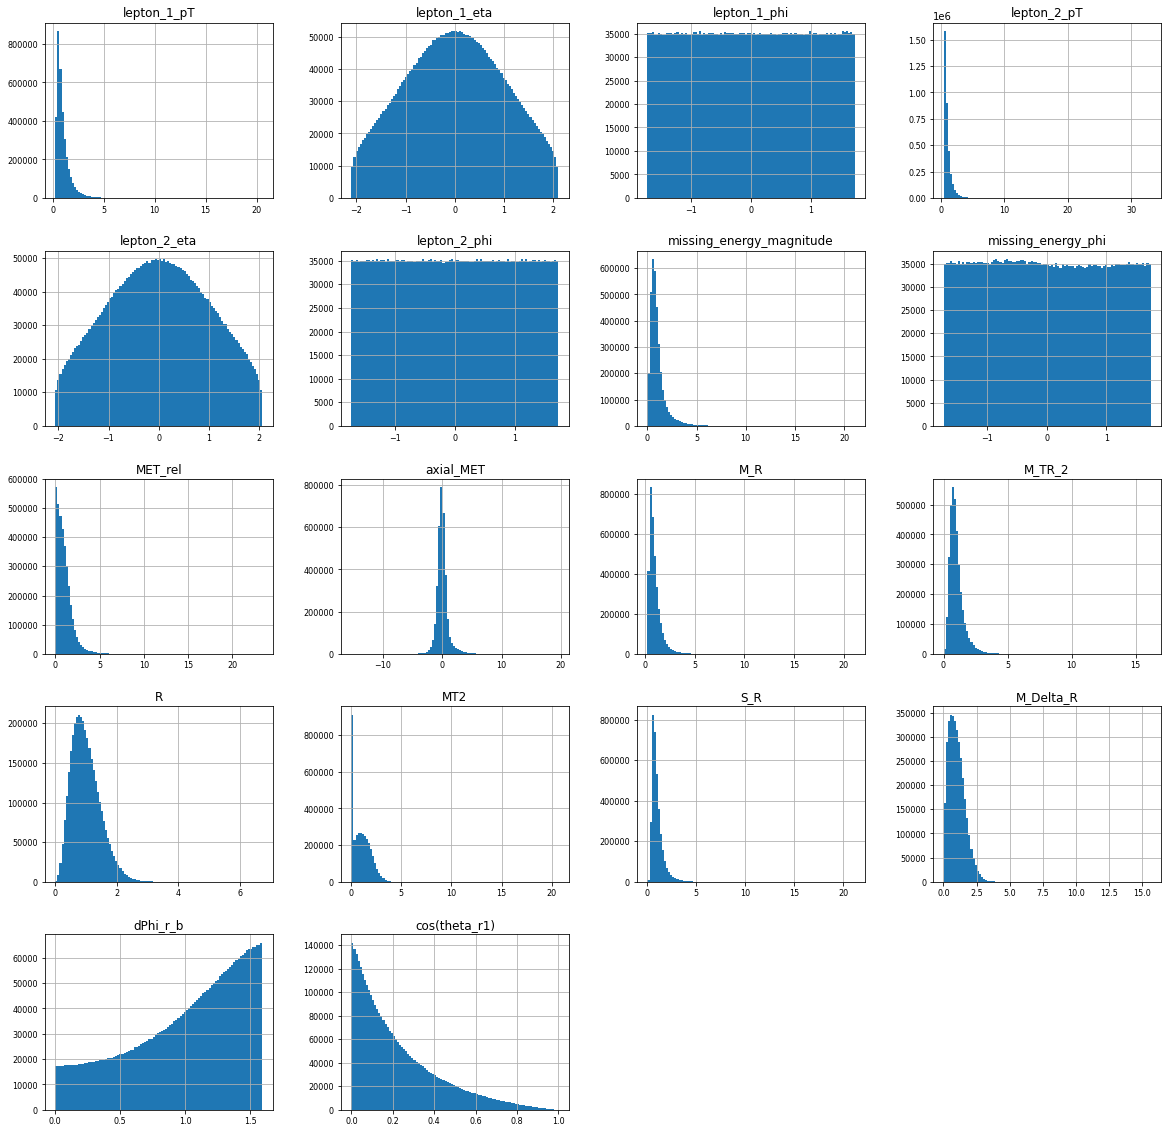

In [7]:
print(input_data[input_data.columns[1:19]].describe())
input_data[input_data.columns[1:19]].hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8);

In [8]:
X = input_data.values[:, 1:19]
Y = input_data.values[:, 19:]
print(X)

[[ 0.8413806   1.83264732 -0.68928593 ...  0.3424969   0.46154228
   0.00571049]
 [ 0.6637978   2.05828977  0.68143451 ...  0.33379972  1.45524657
   0.101246  ]
 [ 1.79222548 -1.09997821  0.08810927 ...  0.64572853  0.72132576
   0.61332601]
 ...
 [ 0.71973038 -0.65562296 -1.23680651 ...  1.26858485  1.24206197
   0.26215601]
 [ 0.670955   -0.45062014 -0.88043845 ...  0.52153593  0.50242722
   0.198597  ]
 [ 0.66509122  1.75135636 -0.65633553 ...  1.25793862  1.23822165
   0.44918799]]


In [9]:
#X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
kf= KFold(n_splits = 5, random_state = 42, shuffle = True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index,],X[test_index]
    Y_train, Y_test = Y[train_index],Y[test_index]

In [11]:
sc=StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
estimators = [('mlp', MLPClassifier(hidden_layer_sizes=(100,100), random_state = 42,
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')),
('rf',RandomForestClassifier(criterion = 'entropy', random_state=42, max_depth = 16, n_estimators=100, n_jobs=-1))]
clf = VotingClassifier(estimators=estimators, voting = 'soft')
clf.fit(X_train_scaled, Y_train)

C:\Users\LENOVO LEGION\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO LEGION\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('mlp',
                              MLPClassifier(hidden_layer_sizes=(100, 100),
                                            max_iter=300, random_state=42)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=16, n_jobs=-1,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
#While only MLP gives slightly higher accuracy, Voting classifier should have a higher accuracy in a larger dataset.

#clf = MLPClassifier(hidden_layer_sizes=(60,60), random_state = 42,
#                        max_iter = 300,activation = 'relu',
#                        solver = 'adam')
#clf.fit(X_train_scaled, Y_train)

In [13]:
Y_pred = clf.predict(X_test_scaled)
Y_pred

array([1., 1., 1., ..., 1., 0., 0.])

In [14]:
print("Accuracy is ", accuracy_score(Y_test,Y_pred))

Accuracy is  0.8039928571428572


In [15]:
test_data = pd.read_csv('C:\\Users\\LENOVO LEGION\\Desktop\\Machine Learning\\Untitled Folder\\test.csv')

In [16]:
X1 = test_data.values[:, 1:19]

In [17]:
sc=StandardScaler()
scaler = sc.fit(X1)
X1_test_scaled = scaler.transform(X1)

In [18]:
preds = clf.predict(X1_test_scaled)

In [19]:
pd.Series(preds).value_counts()

0.0    910040
1.0    589960
dtype: int64

In [20]:
preds = pd.DataFrame(preds)

In [21]:
preds

,0
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
1499995,0.0
1499996,1.0
1499997,0.0
1499998,1.0


In [22]:
preds.rename({0: 'class'}, axis=1, inplace=True)

In [23]:
print(preds)

         class
0          1.0
1          0.0
2          0.0
3          1.0
4          1.0
...        ...
1499995    0.0
1499996    1.0
1499997    0.0
1499998    1.0
1499999    0.0

[1500000 rows x 1 columns]


In [24]:
pd.DataFrame(preds).to_csv('submisssion_file_7.csv', index_label='Id')